# TOF data
Data taken at intervals of $T=0.1ms$, where $T$ represents the period of free flight after trapping. Captured in sequences of 10 ranging from 0.1ms to 1.0ms. 

In [14]:
import os
import datarun
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

In [20]:
d = datarun.Experiment(
    vstart = .1,
    vend = 1.0,
    vstep = .1, 
    idx_start = 11,
    datapath = os.path.join(os.getcwd(),'mar02'),
    numtrials = 10,
    mask=0.25
)

on 0: /Users/Ruobin/Desktop/YALE/Spring2023/PHYS382L/MOTsArentForKids/datarun.py:151: RuntimeWarning: divide by zero encountered in true_divide
        od_arr = np.log(np.divide(I_arr, I0_arr))
/Users/Ruobin/Desktop/YALE/Spring2023/PHYS382L/MOTsArentForKids/datarun.py:151: RuntimeWarning: invalid value encountered in true_divide
        od_arr = np.log(np.divide(I_arr, I0_arr))


|████████████████████████████████████████| 100/100 [100%] in 3:39.0 (0.45/s)                                            


In [21]:
sigma_times = d.structure_data(lambda d : d.popt_x[2]**2)

removed_count = 0
for key in sigma_times:
    sigma = np.std(sigma_times[key]) 
    mean = np.mean(sigma_times[key])
    for val in sigma_times[key]:
        if np.abs(val-mean) > 2*sigma:
            sigma_times[key].remove(val)
            print(key, val)

means = [np.mean(arr) for arr in sigma_times.values()]
errs = [np.std(arr) for arr in sigma_times.values()]
time_list = np.array(list(sigma_times.keys()))

0.5 1.8699219476054908e-07
0.7000000000000001 1.7906433684180919e-07
0.9 2.6559854326437445e-07
1.0 1.4368236087170854e-07


In [22]:
popt, pcov = curve_fit(lambda x,a,b:a*x**2+b, d.vlist, means, sigma=errs)
popt

array([-2.76428438e-08,  2.39295086e-07])

In [19]:
sigma_times

{0.1: [2.8252988514913406e-07,
  2.1937044070481174e-07,
  2.517912723138503e-07,
  2.3112327467515563e-07,
  2.374371948298479e-07,
  2.2926932614469126e-07,
  2.1514968523729963e-07,
  2.1818065099235856e-07,
  2.348998708430969e-07,
  2.76009667942716e-07],
 0.2: [2.804805730000566e-07,
  2.6302767379213814e-07,
  2.4450422543756417e-07,
  2.7383899166795786e-07,
  2.1874360287783093e-07,
  2.163820533681014e-07,
  2.08114116564169e-07,
  2.421660791690811e-07,
  2.09253638245571e-07,
  2.0162254634694284e-07],
 0.30000000000000004: [2.4192220745010595e-07,
  2.1995820907945773e-07,
  2.5583395751188736e-07,
  2.5495955732859884e-07,
  2.5506627206690104e-07,
  2.1432207210616182e-07,
  2.573114144980332e-07,
  2.376157175439569e-07,
  2.1397824164881507e-07,
  2.3742537280968313e-07],
 0.4: [2.1520157330821441e-07,
  2.453390402039694e-07,
  2.5840956509111105e-07,
  2.783633046938631e-07,
  2.543351859661499e-07,
  2.7648880942678986e-07,
  2.201436023452524e-07,
  2.2877516401792

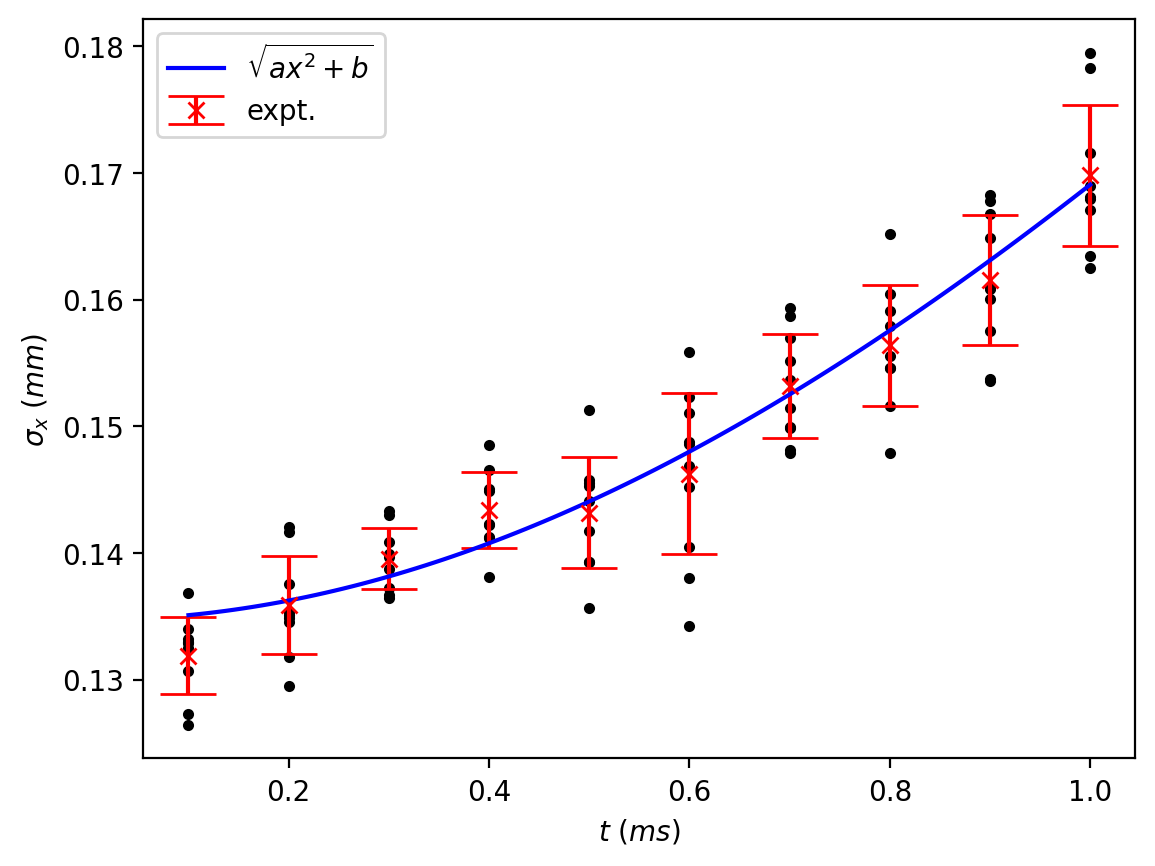

In [6]:
scale = 1e3
plt.errorbar(list(sigma_times.keys()), scale*np.sqrt(np.array(means)), yerr = scale*np.array(errs)/(2*np.sqrt(np.array(means))), linestyle = "None", c = 'r', capsize=10, marker = "x", label = "expt.")
for time, arr in sigma_times.items():
    for val in arr:
        plt.scatter(time, scale*np.sqrt(val), c="k", marker = ".")

xaxis = np.linspace(min(d.vlist), max(d.vlist), 100)
plt.plot(xaxis, scale*np.sqrt((popt[0]*xaxis**2+popt[1])), c="b", label = r"$\sqrt{ax^2+b}$")

plt.xlabel(r"$t \ (ms)$")
plt.ylabel(r"$\sigma_x \ (mm)$")
plt.gcf().set_dpi(200)
plt.legend()

In [7]:
popt

array([1.0443534e-08, 1.8146764e-08])

In [6]:
v_rms = np.sqrt(popt[0])*1e3*np.sqrt(3)
v_err = np.mean(errs)*3*1e6/(np.sqrt(9))*3

First, we have $\langle (x+vt)^2 \rangle = \langle x^2 \rangle + \langle v^2\rangle t^2$, using $\langle v \rangle = 0$, and thus the fit parameter $a$ gives the RMS velocity. Plugging this into the Maxwell-Bolzmann distribution,
$$
v_{rms} = \sqrt{\frac{3RT}{M}} \Rightarrow T = \frac{v_{rms}^2 M}{3R}
$$

In [8]:
v_rms**2*39.1/(3*8.315)*1e3

49.10910136200139

In [9]:
v_err*39.1/(3*8.315)*1e3

6.024989778179798

In [30]:
v_rms

0.1248580256837162

In [31]:
v_err/v_rms

0.03341961714100902

In [32]:
v_err/(2*np.sqrt(v_rms))

0.005904453494224656

In [33]:
v_err

0.004172707415332067